In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [23]:
# Lecture de la base de données

# Construire le chemin d'accès au dataset
script_dir = os.path.abspath('')
relative_path = 'dataset/regularite-mensuelle-tgv-aqst.csv'
csv_path = os.path.join(script_dir, relative_path)

# Chargez le fichier CSV
data = pd.read_csv(csv_path, delimiter=";")
print(data.head())

      date   service         gare_depart         gare_arrivee  duree_moyenne  \
0  2018-01  National    BORDEAUX ST JEAN   PARIS MONTPARNASSE            141   
1  2018-01  National   LA ROCHELLE VILLE   PARIS MONTPARNASSE            165   
2  2018-01  National  PARIS MONTPARNASSE              QUIMPER            220   
3  2018-01  National  PARIS MONTPARNASSE              ST MALO            156   
4  2018-01  National  PARIS MONTPARNASSE  ST PIERRE DES CORPS             61   

   nb_train_prevu  nb_annulation  commentaire_annulation  \
0             870              5                     NaN   
1             222              0                     NaN   
2             248              1                     NaN   
3             102              0                     NaN   
4             391              2                     NaN   

   nb_train_depart_retard  retard_moyen_depart  ...  nb_train_retard_sup_15  \
0                     289            11.247809  ...                     110   


In [24]:
#Info sur les types des données du dataset (float, int, object)
print(data.dtypes)

date                                     object
service                                  object
gare_depart                              object
gare_arrivee                             object
duree_moyenne                             int64
nb_train_prevu                            int64
nb_annulation                             int64
commentaire_annulation                  float64
nb_train_depart_retard                    int64
retard_moyen_depart                     float64
retard_moyen_tous_trains_depart         float64
commentaire_retards_depart              float64
nb_train_retard_arrivee                   int64
retard_moyen_arrivee                    float64
retard_moyen_tous_trains_arrivee        float64
commentaires_retard_arrivee              object
nb_train_retard_sup_15                    int64
retard_moyen_trains_retard_sup15        float64
nb_train_retard_sup_30                    int64
nb_train_retard_sup_60                    int64
prct_cause_externe                      

In [25]:
#Info sur chaque colonne du dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  8154 non-null   object 
 1   service                               8154 non-null   object 
 2   gare_depart                           8154 non-null   object 
 3   gare_arrivee                          8154 non-null   object 
 4   duree_moyenne                         8154 non-null   int64  
 5   nb_train_prevu                        8154 non-null   int64  
 6   nb_annulation                         8154 non-null   int64  
 7   commentaire_annulation                0 non-null      float64
 8   nb_train_depart_retard                8154 non-null   int64  
 9   retard_moyen_depart                   8154 non-null   float64
 10  retard_moyen_tous_trains_depart       8154 non-null   float64
 11  commentaire_retar

In [26]:
#On convertit la colonne 'date' du DataFrame en un format de date spécifique (année-mois)
#en utilisant la fonction pd.to_datetime, et on crée une nouvelle colonne "année" pour faciliter le split
data['date'] = pd.to_datetime(data['date'])
data['annee'] = data['date'].dt.year
data['my']=data['date'].dt.to_period('M')
data



,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,annee,my
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336,2018,2018-01
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,2018,2018-01
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000,2018,2018-01
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000,2018,2018-01
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000,2018,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2023-06-01,National,STRASBOURG,PARIS EST,114,492,2,NaN,273,11.989927,...,31,10,7.619048,5.714286,55.238095,18.095238,7.619048,5.714286,2023,2023-06
8150,2023-06-01,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,273,215,0,NaN,24,28.730556,...,24,10,13.888889,33.333333,8.333333,19.444444,8.333333,16.666667,2023,2023-06
8151,2023-06-01,National,TOURS,PARIS MONTPARNASSE,78,192,1,NaN,20,31.281667,...,7,5,14.285714,21.428571,28.571429,21.428571,3.571429,10.714286,2023,2023-06
8152,2023-06-01,National,VALENCE ALIXAN TGV,PARIS LYON,133,440,2,NaN,347,13.517051,...,62,22,26.724138,19.827586,27.586207,7.758621,7.758621,10.344828,2023,2023-06


In [27]:
#Infos sur le nombre de valeurs nulles (manquantes) dans le dataset
print(data.isnull().sum())

date                                       0
service                                    0
gare_depart                                0
gare_arrivee                               0
duree_moyenne                              0
nb_train_prevu                             0
nb_annulation                              0
commentaire_annulation                  8154
nb_train_depart_retard                     0
retard_moyen_depart                        0
retard_moyen_tous_trains_depart            0
commentaire_retards_depart              8154
nb_train_retard_arrivee                    0
retard_moyen_arrivee                       0
retard_moyen_tous_trains_arrivee           0
commentaires_retard_arrivee             7456
nb_train_retard_sup_15                     0
retard_moyen_trains_retard_sup15           0
nb_train_retard_sup_30                     0
nb_train_retard_sup_60                     0
prct_cause_externe                         0
prct_cause_infra                           0
prct_cause

In [28]:
columns_to_drop = ['commentaire_annulation', 'commentaire_retards_depart', 'commentaires_retard_arrivee']
data = data.drop(columns=columns_to_drop, axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  8154 non-null   datetime64[ns]
 1   service                               8154 non-null   object        
 2   gare_depart                           8154 non-null   object        
 3   gare_arrivee                          8154 non-null   object        
 4   duree_moyenne                         8154 non-null   int64         
 5   nb_train_prevu                        8154 non-null   int64         
 6   nb_annulation                         8154 non-null   int64         
 7   nb_train_depart_retard                8154 non-null   int64         
 8   retard_moyen_depart                   8154 non-null   float64       
 9   retard_moyen_tous_trains_depart       8154 non-null   float64       
 10  

<h3><strong>Analyse des données :</strong></h3><p>

Une petite visualisation de la distribution des services "national" et "international" dans notre dataset.

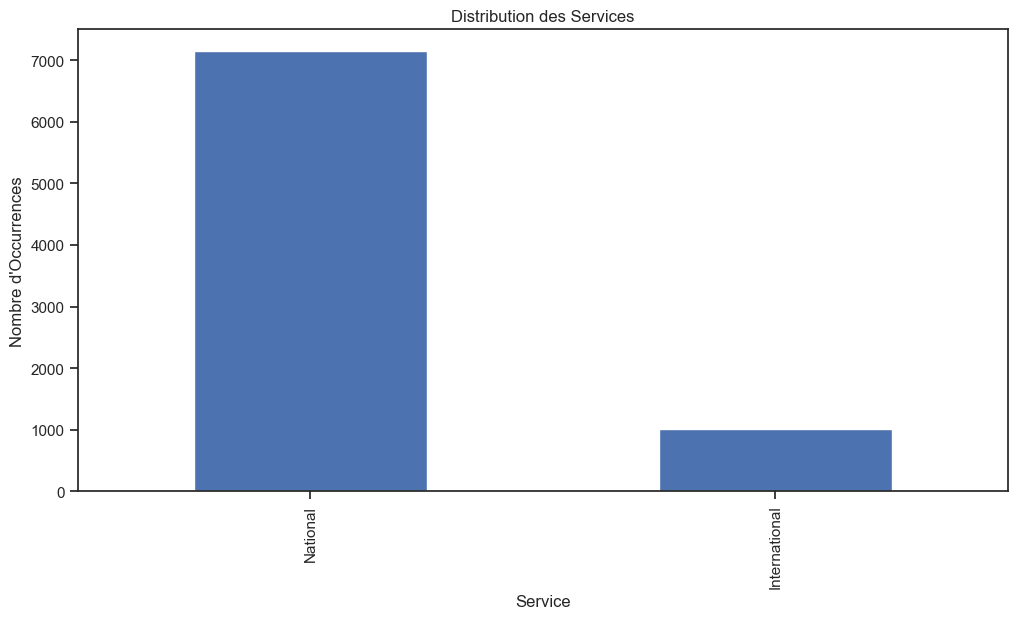

In [29]:
service_counts = data['service'].value_counts()
plt.figure(figsize=(12, 6))
service_counts.plot(kind='bar')
plt.xlabel("Service")
plt.ylabel("Nombre d'Occurrences")
plt.title("Distribution des Services")
plt.show()

Tendances temporelles : Étant donné que nous disposons de données mensuelles, il est utile de vérifier s'il existe une saisonnalité ou des tendances dans les délais et les causes des retards au fil du temps.

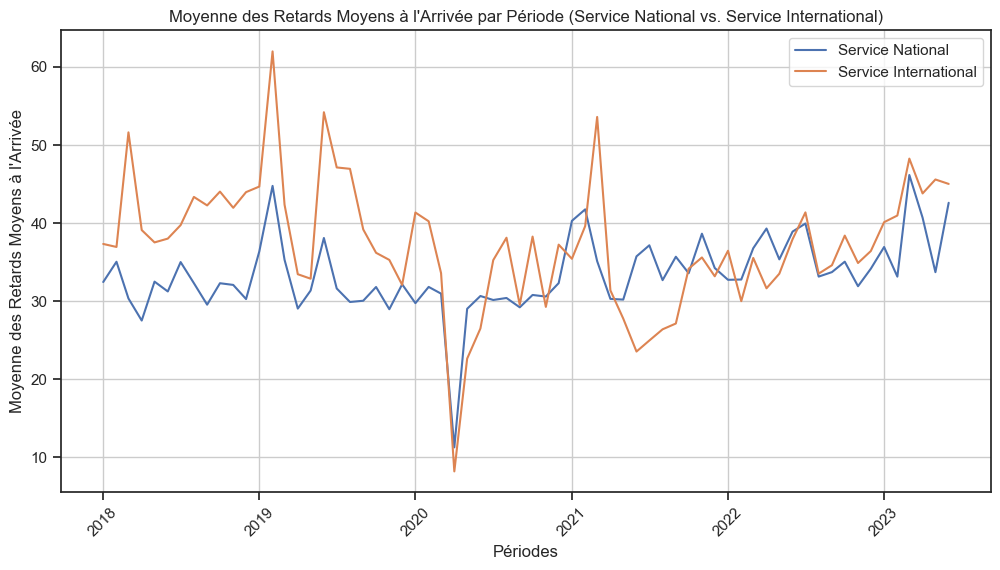

In [30]:

data['my'] = data['my'].dt.to_timestamp()

# Séparez les données en fonction du service
service_national = data[data['service'] == 'National']
service_international = data[data['service'] == 'International']

# Calculez les moyennes des retards pour chaque service
moyennes_retard_national = service_national.groupby('my')['retard_moyen_arrivee'].mean()
moyennes_retard_international = service_international.groupby('my')['retard_moyen_arrivee'].mean()

# Créez un graphique pour afficher les deux courbes
plt.figure(figsize=(12, 6))
plt.plot(moyennes_retard_national.index, moyennes_retard_national.values, label='Service National')
plt.plot(moyennes_retard_international.index, moyennes_retard_international.values, label='Service International')
plt.xlabel("Périodes")
plt.ylabel("Moyenne des Retards Moyens à l'Arrivée")
plt.title("Moyenne des Retards Moyens à l'Arrivée par Période (Service National vs. Service International)")
plt.grid(True)
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des abscisses pour une meilleure lisibilité
plt.legend()

plt.show()

Le graphique montre la moyenne des retards moyens à l'arrivée dans le temps. Les données semblent présenter une certaine saisonnalité, avec des pics et des creux à intervalles réguliers. Cela suggère que certains mois ou certaines périodes peuvent présenter des retards plus ou moins importants, ce qui pourrait constituer une information précieuse pour la modélisation.

Ici nous essayons de visualiser la corrélation entre la variable que nous souhaitons prédire 'Target' et les autres variables numériques :

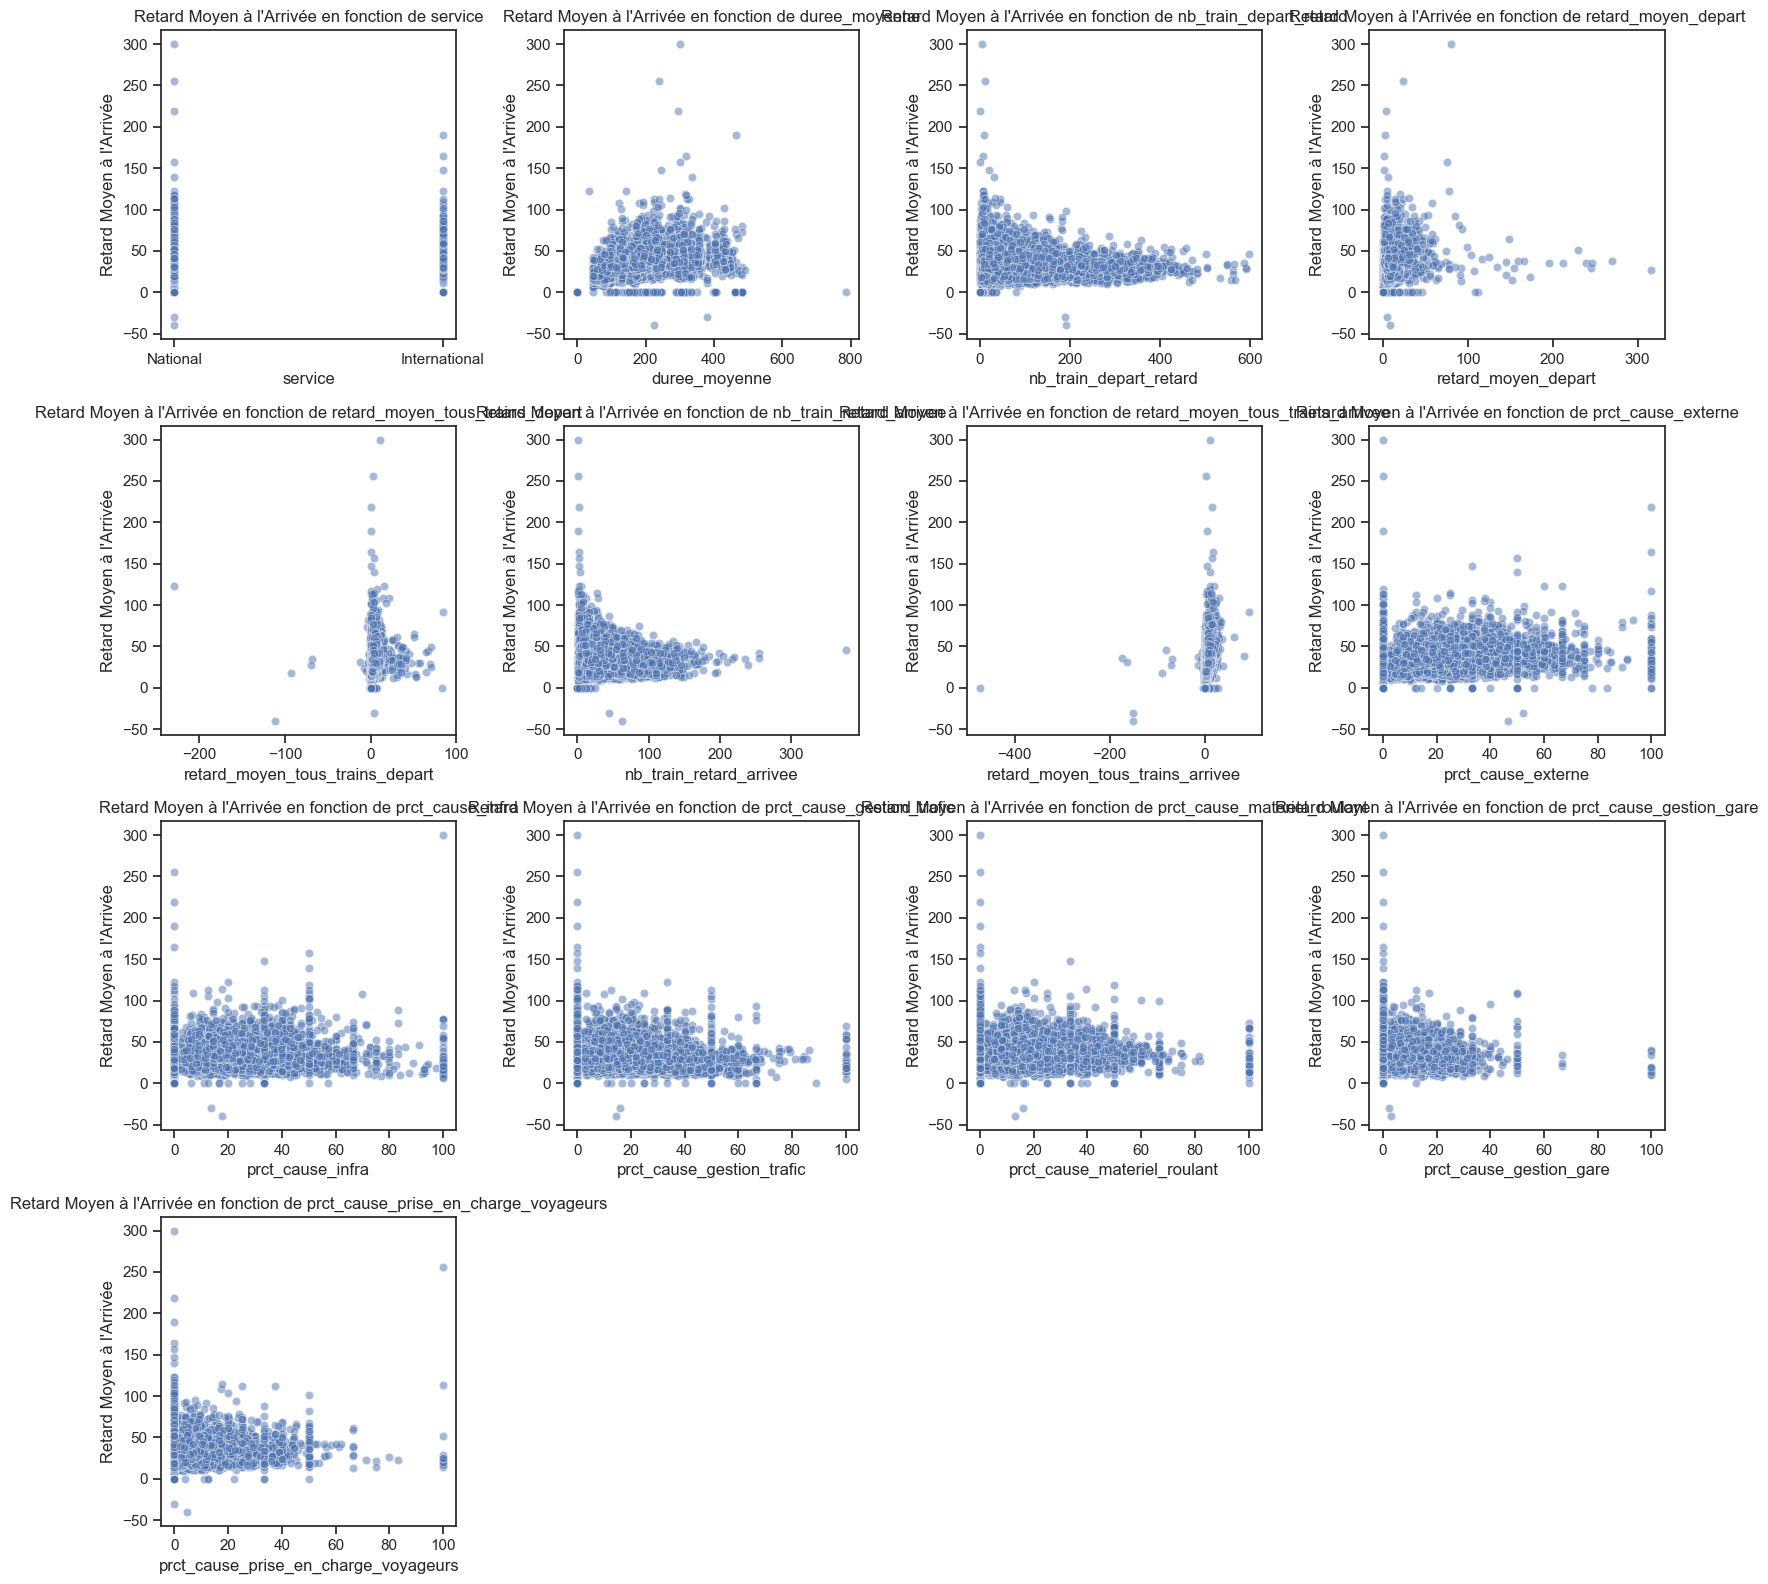

In [31]:

# Sélection les colonnes que vous souhaitez inclure dans la pairplot
variables_a_inclure = ['service', 'duree_moyenne', 
                       'nb_train_depart_retard', 'retard_moyen_depart', 'retard_moyen_tous_trains_depart',
                       'nb_train_retard_arrivee', 'retard_moyen_tous_trains_arrivee','prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
                       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare', 
                       'prct_cause_prise_en_charge_voyageurs'
                    ]

# Calcul du nombre de lignes et de colonnes nécessaires en fonction du nombre de variables
num_variables = len(variables_a_inclure)
num_rows = int(np.ceil(num_variables / 4))
num_cols = 4

# Création d'une grille de sous-graphiques
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# Création d'une pairplot avec "retard_moyen_arrivée" en fonction de chaque variable
sns.set(style="ticks")

for i, variable in enumerate(variables_a_inclure):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=data[variable], y=data['retard_moyen_arrivee'], ax=axes[row, col], alpha=0.5)
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel("Retard Moyen à l'Arrivée")
    axes[row, col].set_title(f"Retard Moyen à l'Arrivée en fonction de {variable}")
    
# Suppression des sous-graphiques non utilisés
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

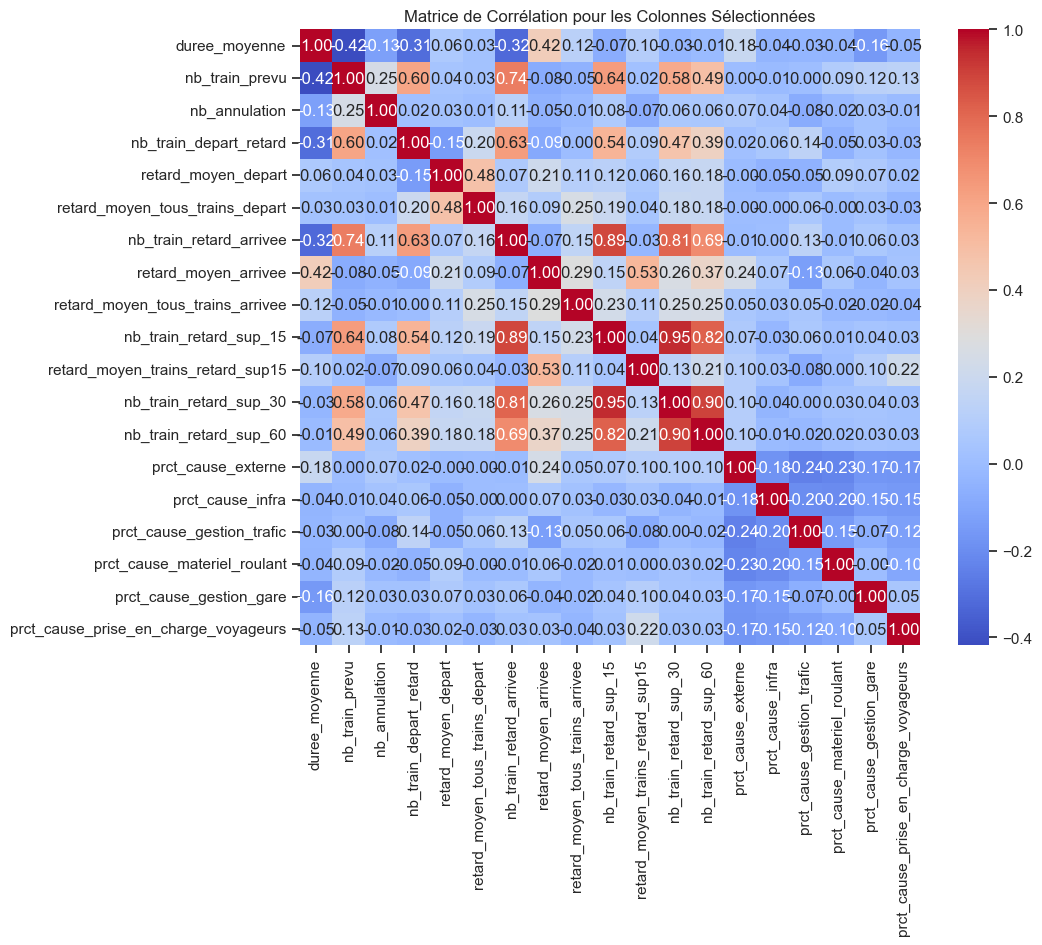

In [33]:
# Sélection des colonnes spécifiques pour lesquelles nous souhaitons créer la matrice de corrélation
selected_columns = ['duree_moyenne', 'nb_train_prevu', 'nb_annulation', 'nb_train_depart_retard', 'retard_moyen_depart', 'retard_moyen_tous_trains_depart', 'nb_train_retard_arrivee', 'retard_moyen_arrivee', 'retard_moyen_tous_trains_arrivee', 'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15', 'nb_train_retard_sup_30', 'nb_train_retard_sup_60', 'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic', 'prct_cause_materiel_roulant', 'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs',
]

# Création d'un sous-DataFrame avec les colonnes sélectionnées
subset_data = data[selected_columns]

# Calcule de la matrice de corrélation pour le sous-DataFrame
correlation_matrix = subset_data.corr()

# Création d'une heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation pour les Colonnes Sélectionnées")
plt.show()

<strong>Analyse de corrélation :</strong>

- La variable retard_moyen_trains_retard_sup15 (retard moyen des trains retardés de plus de 15 minutes) présente une corrélation positive élevée avec notre objectif retard_moyen_arrivee. Ceci est normal puisque les trains ayant des retards plus importants augmentent le retard moyen global.
- duree_moyenne (durée moyenne) présente également une corrélation positive avec l'objectif. Les trajets plus longs peuvent avoir plus de chances de subir des retards.
- nb_train_retard_sup_60 (nombre de trains retardés de plus de 60 minutes) est une autre caractéristique positivement corrélée avec le retard moyen.
- Les causes externes (prct_cause_externe) présentent également une corrélation positive, ce qui indique que les facteurs externes peuvent contribuer de manière significative aux retards.
- D'autre part, la gestion du trafic (prct_cause_gestion_trafic) présente une corrélation négative, ce qui suggère que plus le pourcentage de retards dus à la gestion du trafic augmente, plus le retard moyen peut diminuer.
\end{itemize}

Quelques suggestions de feature engineering : 

- Caractéristiques temporelles : Extraire le mois ou la saison de la date pour saisir les tendances saisonnières des retards.
- Classement en catégories : Pour les variables continues telles que duree_moyenne, nous pouvons créer des bacs pour les convertir en caractéristiques catégorielles, afin de capturer les relations non linéaires.